In [ ]:
print('Radhe Radhe')

Radhe Radhe


In [ ]:
# Import Libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For statistical data visualization
import warnings  # To handle warnings

import random

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Ignore all warnings
warnings.filterwarnings("ignore")  # Suppresses all warnings from appearing

# Configure pandas display options
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame
pd.set_option('display.max_rows', None)  # Display all rows in the DataFrame

# Set Seaborn theme for a clean grid-based style
sns.set_theme(style="whitegrid")  # Sets white grid background for Seaborn plots

## ***1. Know Your Data***

### Dataset Loading

In [ ]:
# load Dataset

# Function to load a CSV file into a pandas DataFrame
def load_csv(file_path):
    """
    Loads a CSV file into a pandas DataFrame.
    If an error occurs (e.g., file not found), it prints the error and returns None.

    Parameters:
    file_path (str): The file path of the CSV file.

    Returns:
    pd.DataFrame or None: Returns the loaded DataFrame if successful, otherwise None.
    """
    try:
        return pd.read_csv(file_path)  # Load the CSV file
    except Exception as e:
        print(f"Error: {e}")  # Print error message if loading fails
        return None  # Return None in case of failure

In [ ]:
path_credits = "/content/tmdb_5000_credits.csv"
credits = load_csv(file_path=path_credits)  # Load df

In [ ]:
path_movies = "/content/tmdb_5000_movies.csv"
movies = load_csv(file_path=path_movies)  # Load df

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [ ]:
dataset = pd.merge(credits , movies , left_on='movie_id' ,right_on = 'id' )

In [ ]:
dataset = pd.merge(credits , movies ,on = 'title' )

In [ ]:
dataset.head(1)

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800


In [ ]:
dataset.shape

(4809, 23)

### Dataset First View

In [ ]:
dataset.head()

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(4809, 23)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4809 non-null   int64  
 1   title                 4809 non-null   object 
 2   cast                  4809 non-null   object 
 3   crew                  4809 non-null   object 
 4   budget                4809 non-null   int64  
 5   genres                4809 non-null   object 
 6   homepage              1713 non-null   object 
 7   id                    4809 non-null   int64  
 8   keywords              4809 non-null   object 
 9   original_language     4809 non-null   object 
 10  original_title        4809 non-null   object 
 11  overview              4806 non-null   object 
 12  popularity            4809 non-null   float64
 13  production_companies  4809 non-null   object 
 14  production_countries  4809 non-null   object 
 15  release_date         

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

movie_id                   0
title                      0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
vote_average               0
vote_count                 0
dtype: int64


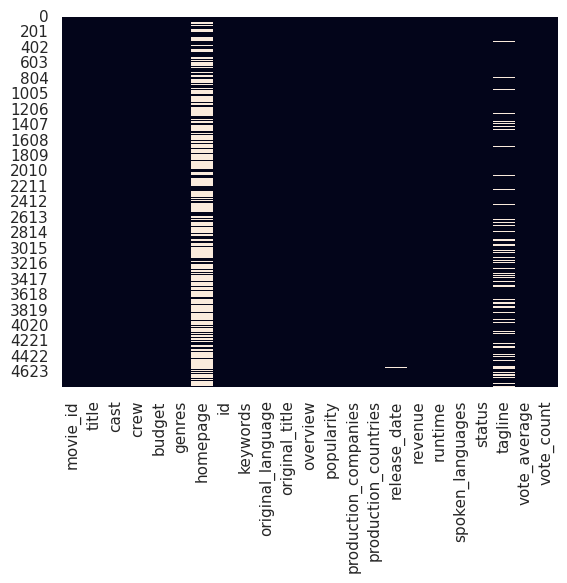

In [ ]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['movie_id', 'title', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'id', 'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include='all')

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
count,4809.000000,4809,4809,4809,4.809000e+03,4809,1713,4809.000000,4809,4809,4809,4806,4809.000000,4809,4809,4808,4.809000e+03,4807.000000,4809,4809,3965,4809.000000,4809.000000
unique,NaN,4800,4761,4776,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,NaN,NaN
top,NaN,The Host,[],[],NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,NaN,[],en,Batman,Gang-du is a dim-witted man working at his fat...,NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,NaN,NaN
freq,NaN,4,43,28,NaN,372,4,NaN,412,4510,4,2,NaN,352,2979,10,NaN,NaN,3175,4801,3,NaN,NaN
mean,57120.571429,NaN,NaN,NaN,2.902780e+07,NaN,NaN,57120.571429,NaN,NaN,NaN,NaN,21.491664,NaN,NaN,NaN,8.227511e+07,106.882255,NaN,NaN,NaN,6.092514,690.331670
std,88653.369849,NaN,NaN,NaN,4.070473e+07,NaN,NaN,88653.369849,NaN,NaN,NaN,NaN,31.803366,NaN,NaN,NaN,1.628379e+08,22.602535,NaN,NaN,NaN,1.193989,1234.187111
min,5.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,0.000000,0.000000
25%,9012.000000,NaN,NaN,NaN,7.800000e+05,NaN,NaN,9012.000000,NaN,NaN,NaN,NaN,4.667230,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,5.600000,54.000000
50%,14624.000000,NaN,NaN,NaN,1.500000e+07,NaN,NaN,14624.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,6.200000,235.000000
75%,58595.000000,NaN,NaN,NaN,4.000000e+07,NaN,NaN,58595.000000,NaN,NaN,NaN,NaN,28.350529,NaN,NaN,NaN,9.291317e+07,118.000000,NaN,NaN,NaN,6.800000,737.000000


In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  movie_id is 4803 .
No. of unique values in  title is 4800 .
No. of unique values in  cast is 4761 .
No. of unique values in  crew is 4776 .
No. of unique values in  budget is 436 .
No. of unique values in  genres is 1175 .
No. of unique values in  homepage is 1691 .
No. of unique values in  id is 4803 .
No. of unique values in  keywords is 4222 .
No. of unique values in  original_language is 37 .
No. of unique values in  original_title is 4801 .
No. of unique values in  overview is 4800 .
No. of unique values in  popularity is 4802 .
No. of unique values in  production_companies is 3697 .
No. of unique values in  production_countries is 469 .
No. of unique values in  release_date is 3280 .
No. of unique values in  revenue is 3297 .
No. of unique values in  runtime is 156 .
No. of unique values in  spoken_languages is 544 .
No. of unique values in  status is 3 .
No. of unique values in  tagline is 3944 .
No. of unique values in  vote_average is 71 .
No. of uniqu

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your df analysis ready.
# Create a copy of the current dataset and assigning to df
df  =dataset.copy()

In [ ]:
df.columns

Index(['movie_id', 'title', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'id', 'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
# Select key columns to keep for analysis
key_columns =['movie_id', 'title', 'cast', 'crew', 'genres','keywords', 'overview']

# # Filter df to include only the selected columns
df = df.loc[:,key_columns]

In [ ]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   cast      4809 non-null   object
 3   crew      4809 non-null   object
 4   genres    4809 non-null   object
 5   keywords  4809 non-null   object
 6   overview  4806 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


In [ ]:
df.drop_duplicates(subset='title',inplace=True)

In [ ]:
df.isna().sum()

,0
movie_id,0
title,0
cast,0
crew,0
genres,0
keywords,0
overview,3


In [ ]:
df.dropna(inplace  = True)

In [ ]:
df.iloc[1]['cast']

'[{"cast_id": 4, "character": "Captain Jack Sparrow", "credit_id": "52fe4232c3a36847f800b50d", "gender": 2, "id": 85, "name": "Johnny Depp", "order": 0}, {"cast_id": 5, "character": "Will Turner", "credit_id": "52fe4232c3a36847f800b511", "gender": 2, "id": 114, "name": "Orlando Bloom", "order": 1}, {"cast_id": 6, "character": "Elizabeth Swann", "credit_id": "52fe4232c3a36847f800b515", "gender": 1, "id": 116, "name": "Keira Knightley", "order": 2}, {"cast_id": 12, "character": "William \\"Bootstrap Bill\\" Turner", "credit_id": "52fe4232c3a36847f800b52d", "gender": 2, "id": 1640, "name": "Stellan Skarsg\\u00e5rd", "order": 3}, {"cast_id": 10, "character": "Captain Sao Feng", "credit_id": "52fe4232c3a36847f800b525", "gender": 2, "id": 1619, "name": "Chow Yun-fat", "order": 4}, {"cast_id": 9, "character": "Captain Davy Jones", "credit_id": "52fe4232c3a36847f800b521", "gender": 2, "id": 2440, "name": "Bill Nighy", "order": 5}, {"cast_id": 7, "character": "Captain Hector Barbossa", "credit_

In [ ]:
df.iloc[1]['crew']

'[{"credit_id": "52fe4232c3a36847f800b579", "department": "Camera", "gender": 2, "id": 120, "job": "Director of Photography", "name": "Dariusz Wolski"}, {"credit_id": "52fe4232c3a36847f800b4fd", "department": "Directing", "gender": 2, "id": 1704, "job": "Director", "name": "Gore Verbinski"}, {"credit_id": "52fe4232c3a36847f800b54f", "department": "Production", "gender": 2, "id": 770, "job": "Producer", "name": "Jerry Bruckheimer"}, {"credit_id": "52fe4232c3a36847f800b503", "department": "Writing", "gender": 2, "id": 1705, "job": "Screenplay", "name": "Ted Elliott"}, {"credit_id": "52fe4232c3a36847f800b509", "department": "Writing", "gender": 2, "id": 1706, "job": "Screenplay", "name": "Terry Rossio"}, {"credit_id": "52fe4232c3a36847f800b57f", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "52fe4232c3a36847f800b585", "department": "Editing", "gender": 2, "id": 1722, "job": "Editor", "name": "Craig Wood"}, {"credit_id": "52f

In [ ]:
df.iloc[1]['genres']

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [ ]:
df.iloc[1]['keywords']

'[{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one\'s life"}, {"id": 2052, "name": "traitor"}, {"id": 2580, "name": "shipwreck"}, {"id": 2660, "name": "strong woman"}, {"id": 3799, "name": "ship"}, {"id": 5740, "name": "alliance"}, {"id": 5941, "name": "calypso"}, {"id": 6155, "name": "afterlife"}, {"id": 6211, "name": "fighter"}, {"id": 12988, "name": "pirate"}, {"id": 157186, "name": "swashbuckler"}, {"id": 179430, "name": "aftercreditsstinger"}]'

In [ ]:
type(eval(df.iloc[1]['cast']))

list

In [ ]:
pd.json_normalize(eval(df.iloc[1]['cast'])).head()

,cast_id,character,credit_id,gender,id,name,order
0,4,Captain Jack Sparrow,52fe4232c3a36847f800b50d,2,85,Johnny Depp,0
1,5,Will Turner,52fe4232c3a36847f800b511,2,114,Orlando Bloom,1
2,6,Elizabeth Swann,52fe4232c3a36847f800b515,1,116,Keira Knightley,2
3,12,"William ""Bootstrap Bill"" Turner",52fe4232c3a36847f800b52d,2,1640,Stellan Skarsgård,3
4,10,Captain Sao Feng,52fe4232c3a36847f800b525,2,1619,Chow Yun-fat,4


In [ ]:
lst = []
for i in eval(df.iloc[1]['cast']) :
  lst.append (i['name'])


In [ ]:
lst

In [ ]:
import ast

In [ ]:
# def cast_conveter(lst):
#   result = []
#   ite = 1
#   for i in eval(lst) :
#     if ite < 3 :
#       result.append (i['name'])
#       ite += 1
#     else:
#       break
#   return result

In [ ]:
def converter(lst):
  result = []
  for i in eval(lst) :
      result.append (i['name'])
  return result

In [ ]:
def cast_converter(cast_str):
    import ast  # Safe alternative to eval

    result = []
    try:
        # Safely parse string to list using ast.literal_eval
        cast_list = ast.literal_eval(cast_str)

        for i, actor in enumerate(cast_list):
            if i < 3:  # Get first 2 only
                result.append(actor['name'])
            else:
                break

    except (ValueError, SyntaxError, KeyError):
        # Handle parsing errors gracefully
        return []

    return result

# Usage (your line corrected)
cast_list = cast_converter(df.iloc[1]['cast'])
print(cast_list)

['Johnny Depp', 'Orlando Bloom', 'Keira Knightley']


In [ ]:
def director_converter(lst):
    import ast  # Safe alternative to eval

    result = []
    lst = ast.literal_eval(lst)

    for i in lst:
        if i['job'] == 'Director' :
          result.append(i['name'])
          break


    return result

# Usage (your line corrected)
cast_list = director_converter(df.iloc[1]['crew'])
print(cast_list)

['Gore Verbinski']


In [ ]:
def overview_converter(text) :
  lst = text.split()
  return lst

# Usage (your line corrected)
cast_list = overview_converter(df.iloc[1]['overview'])
print(cast_list)

['Captain', 'Barbossa,', 'long', 'believed', 'to', 'be', 'dead,', 'has', 'come', 'back', 'to', 'life', 'and', 'is', 'headed', 'to', 'the', 'edge', 'of', 'the', 'Earth', 'with', 'Will', 'Turner', 'and', 'Elizabeth', 'Swann.', 'But', 'nothing', 'is', 'quite', 'as', 'it', 'seems.']


In [ ]:
def space_remover(lst):
  result = []
  for i in lst:
    result.append(i.replace(' ' , ''))
  return result

In [ ]:
df['cast'] = df['cast'].apply(cast_converter)

In [ ]:
df['crew'] = df['crew'].apply(director_converter)

In [ ]:
df['genres'] = df['genres'].apply(converter)

In [ ]:
df['keywords'] = df['keywords'].apply(converter)

In [ ]:
df['overview'] = df['overview'].apply(lambda x : x.split())

In [ ]:
df.head()

,movie_id,title,cast,crew,genres,keywords,overview
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili..."


In [ ]:
df['cast'] = df['cast'].apply(space_remover)

In [ ]:
df['cast'] = df['cast'].apply(space_remover)
df['crew'] = df['crew'].apply(space_remover)
df['genres'] = df['genres'].apply(space_remover)
df['keywords'] = df['keywords'].apply(space_remover)

In [ ]:
df['tags'] = df['cast'] + df.crew + df.genres + df.keywords + df.overview

In [ ]:
df.head()

,movie_id,title,cast,crew,genres,keywords,overview,tags
0,19995,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ..."
1,285,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Gor..."
2,206647,Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux, SamM..."
3,49026,The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman, Chri..."
4,49529,John Carter,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton, An..."


In [ ]:
df.iloc[0] ['tags']

In [ ]:
main_df = df[['movie_id' , 'title' , 'tags']]

In [ ]:
main_df.head()

,movie_id,title,tags
0,19995,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ..."
1,285,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Gor..."
2,206647,Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux, SamM..."
3,49026,The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman, Chri..."
4,49529,John Carter,"[TaylorKitsch, LynnCollins, SamanthaMorton, An..."


In [ ]:
main_df['tags'] = main_df['tags'].apply(lambda x : ' '.join(x))

In [ ]:
main_df.head()

,movie_id,title,tags
0,19995,Avatar,SamWorthington ZoeSaldana SigourneyWeaver Jame...
1,285,Pirates of the Caribbean: At World's End,JohnnyDepp OrlandoBloom KeiraKnightley GoreVer...
2,206647,Spectre,DanielCraig ChristophWaltz LéaSeydoux SamMende...
3,49026,The Dark Knight Rises,ChristianBale MichaelCaine GaryOldman Christop...
4,49529,John Carter,TaylorKitsch LynnCollins SamanthaMorton Andrew...


In [ ]:
main_df['tags'] = main_df['tags'].apply(lambda x : x.lower())

In [ ]:
main_df.head()

,movie_id,title,tags
0,19995,Avatar,samworthington zoesaldana sigourneyweaver jame...
1,285,Pirates of the Caribbean: At World's End,johnnydepp orlandobloom keiraknightley gorever...
2,206647,Spectre,danielcraig christophwaltz léaseydoux sammende...
3,49026,The Dark Knight Rises,christianbale michaelcaine garyoldman christop...
4,49529,John Carter,taylorkitsch lynncollins samanthamorton andrew...


## 4. ***Model Building***

In [ ]:
# Download required NLTK resources (only first time)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Preprocessing function
def preprocess(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Tokenize
    tokens = word_tokenize(text)
    # 3. Lemmatize + remove stopwords + keep only alphanumeric tokens
    clean_tokens = [
        lemmatizer.lemmatize(w)
        for w in tokens
        if w.isalnum() and w not in stop_words
    ]
    # 4. Rejoin into a cleaned string
    return ' '.join(clean_tokens)

In [ ]:
main_df.head()

,movie_id,title,tags
0,19995,Avatar,samworthington zoesaldana sigourneyweaver jame...
1,285,Pirates of the Caribbean: At World's End,johnnydepp orlandobloom keiraknightley gorever...
2,206647,Spectre,danielcraig christophwaltz léaseydoux sammende...
3,49026,The Dark Knight Rises,christianbale michaelcaine garyoldman christop...
4,49529,John Carter,taylorkitsch lynncollins samanthamorton andrew...


In [ ]:
# Apply preprocessing
main_df['modified_tags'] = main_df['tags'].apply(preprocess)

In [ ]:
main_df.head()

,movie_id,title,tags,modified_tags
0,19995,Avatar,samworthington zoesaldana sigourneyweaver jame...,samworthington zoesaldana sigourneyweaver jame...
1,285,Pirates of the Caribbean: At World's End,johnnydepp orlandobloom keiraknightley gorever...,johnnydepp orlandobloom keiraknightley gorever...
2,206647,Spectre,danielcraig christophwaltz léaseydoux sammende...,danielcraig christophwaltz léaseydoux sammende...
3,49026,The Dark Knight Rises,christianbale michaelcaine garyoldman christop...,christianbale michaelcaine garyoldman christop...
4,49529,John Carter,taylorkitsch lynncollins samanthamorton andrew...,taylorkitsch lynncollins samanthamorton andrew...


In [ ]:
main_df.shape

(4797, 4)

In [ ]:
# TF-IDF Vectorization
# tfidf = TfidfVectorizer(max_features=5000)
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(main_df['modified_tags'])

In [ ]:
len(tfidf.get_feature_names_out().tolist())

32137

In [ ]:
tfidf.get_feature_names_out().tolist()[:49]

In [ ]:
similarity = cosine_similarity(tfidf_matrix)

In [ ]:
similarity.shape

(4797, 4797)

In [ ]:
index = main_df[main_df['title'] == 'The Dark Knight Rises'].index[0]

In [ ]:
index

np.int64(3)

In [ ]:
distances = similarity[index]
distances

array([0.01384381, 0.00240168, 0.00921838, ..., 0.01644959, 0.03484954,
       0.01463524])

In [ ]:
def recommend(title, top_n = 5):
    index = main_df[main_df['title'] == title].index[0]
    distances = similarity[index]
    similar_items = sorted(
        list(enumerate(distances)),
        key=lambda x: x[1],
        reverse=True
    )[1:top_n + 1]  # skip itself, show top 5
    for i in similar_items:
        print(main_df.iloc[i[0]].title)


In [ ]:
recommend('The Dark Knight' , 5)

The Dark Knight Rises
Batman Returns
Batman Begins
Batman: The Dark Knight Returns, Part 2
Batman Forever


In [ ]:
recommend('Iron Man' , 5)

Iron Man 2
Iron Man 3
Avengers: Age of Ultron
The Avengers
Captain America: Civil War
